<center><h1>Analyse du PancakeSort</h1></center>

Dans ce document nous analyser les résultats de l'algorithme PancakeSort afin de déterminer les conditions dans lesquelles l'algorithme est le plus performant.

## Analyse théorique 

Avant d'analyser le résultat de nos expérimentations sur cet algorithme, nous allons étudier la complexité du PancakeSort.

Algorithme PancakeSort :

    #Trouve plus grand élément
    fonction maxIndex(tableau T, entier k):
        index = 0
        Pour i allant de 0 à k-1 Faire
            Si arr[i] > arr[index] Alors
                index = i
        retourner index
        
    fonction inverseOrdre(tableau T, entier k):
        gauche = 0
        Tant que gauche < k Faire
            echanger(T[gauche],T[k])
            k --
            gauche ++
            
            
                

    fonction PancakeSort(tableau T, taille N):

        Pour i allant de N-1 à 0 Faire
            maxdex = maxIndex(T,i)
            inverseOrdre(T,maxedex)
            inverseOrdre(T,i-1)
            
Source : https://en.wikipedia.org/wiki/Pancake_sorting

La fonction PancakeSort utilise deux fonctions la première est maxIndex qui permet de calculer l'index de l'élément le plus grand, ainsi que inverseOrdre qui inverse l'ordre des éléments du tableau.

maxIndex effectue une boucle "Pour" allant de 0 à k-1 il effectue alors k comparaisons, ainsi sa complexité est en O(k).

inverseOrdre, lui, effectue une boucle "Tant que" effectuant k//2 itérations puisque que gauche est incrémenté de 1 et k décrémenté de 1 à chaque tour de boucles. Sa complexité est donc aussi en O(k).

La fonction PancakeSort effectue "Pour" qui va effectuer N fois la fonction maxIndex et inverseOrdre, ainsi la complexité finale en temps de cet algorithme est de O(N²) dans tous les cas.

Sa complexité en espace est en O(1) puisque c'est un tri en place.



## Analyse des résultats de PancakeSort

Dans cette partie nous allons analyser l'efficacité constatée de l'algorithme PancakeSort.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from scipy import odr
import time

### Tri de int

On importe dans la cellule suivante les données et on nomme les colonnes.

In [2]:
data = pd.read_csv('result_data/PancakeSort.csv',sep=',')# On récupère les données correspondantes
print("Fichier lu")

data.columns = ["NumberElements","NombreEchangeRd",
                     "NombreComparaisonRd","TempsMSRd","NombreEchange1_2",
                     "NombreComparaison1_2","TempsMS1_2","NombreEchangeStart25",
                     "NombreComparaisonStart25","TempsMSStart25",
                     "NombreEchangeStart50","NombreComparaisonStart50",
                     "TempsMSStart50","NombreEchangeEnd25",
                     "NombreComparaisonEnd25","TempsMSEnd25",
                     "NombreEchangeEnd50","NombreComparaisonEnd50",
                     "TempsMSEnd50","NombreEchangeSorted",
                     "NombreComparaisonSorted","TempsMSSorted"]

Fichier lu


#### En particulier

On va comparer les temps d'exécution, le nombre de comparaisons, d'échanges, pour un grand nombre n afin de voir s'il y a un cas de désordre désavantageux.

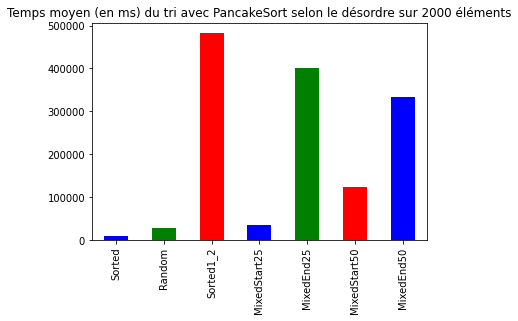

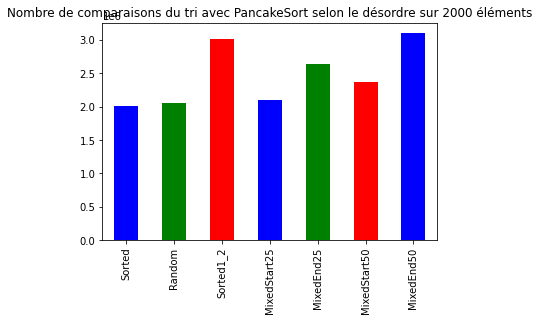

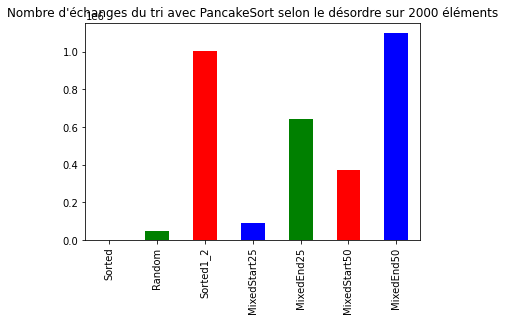

In [3]:
NomAlgorithme = "PancakeSort"
n = 2000
vitesseDF = pd.DataFrame({
    'Elements':data.loc[:,'NumberElements'],
    'Sorted' : data.loc[:,'TempsMSSorted'],
    'Random' : data.loc[:,'TempsMSRd'],
    'Sorted1_2': data.loc[:,'TempsMS1_2'],
    'MixedStart25': data.loc[:,'TempsMSStart25'],
    'MixedEnd25': data.loc[:,'TempsMSEnd25'],
    'MixedStart50': data.loc[:,'TempsMSStart50'],
    'MixedEnd50': data.loc[:,'TempsMSEnd50']
})

echangesDF = pd.DataFrame({
    'Elements':data.loc[:,'NumberElements'],
    'Sorted' : data.loc[:,'NombreEchangeSorted'],
    'Random' : data.loc[:,'NombreEchangeRd'],
    'Sorted1_2': data.loc[:,'NombreEchange1_2'],
    'MixedStart25': data.loc[:,'NombreEchangeStart25'],
    'MixedEnd25': data.loc[:,'NombreEchangeEnd25'],
    'MixedStart50': data.loc[:,'NombreEchangeStart50'],
    'MixedEnd50': data.loc[:,'NombreEchangeEnd50']
})

comparaisonsDF = pd.DataFrame({
    'Elements':data.loc[:,'NumberElements'],
    'Sorted' : data.loc[:,'NombreComparaisonSorted'],
    'Random' : data.loc[:,'NombreComparaisonRd'],
    'Sorted1_2': data.loc[:,'NombreComparaison1_2'],
    'MixedStart25': data.loc[:,'NombreComparaisonStart25'],
    'MixedEnd25': data.loc[:,'NombreComparaisonEnd25'],
    'MixedStart50': data.loc[:,'NombreComparaisonStart50'],
    'MixedEnd50': data.loc[:,'NombreComparaisonEnd50']
})

finalCmpDF = pd.DataFrame({
    'Comparaisons': comparaisonsDF.loc[n,vitesseDF.columns != 'Elements']
})
finalTimeDF = pd.DataFrame({
    'Temps': vitesseDF.loc[n,vitesseDF.columns != 'Elements']
})
finalExDF = pd.DataFrame({
    'Echanges': echangesDF.loc[n,echangesDF.columns != 'Elements']
})

plt.figure()

finalTimeDF['Temps'].plot(kind = "bar", color = ['b','g','r'])
plt.title("Temps moyen (en ms) du tri avec " + NomAlgorithme + " selon le désordre sur " + str(n) + " éléments")
plt.show()

finalCmpDF['Comparaisons'].plot(kind = "bar", color = ['b','g','r'])
plt.title("Nombre de comparaisons du tri avec " + NomAlgorithme + " selon le désordre sur " + str(n) + " éléments")
plt.show()

finalExDF['Echanges'].plot(kind = "bar", color = ['b','g','r'])
plt.title("Nombre d'échanges du tri avec " + NomAlgorithme + " selon le désordre sur " + str(n) + " éléments")
plt.show()

Ici on s'aperçoit que l'algorithme est plus efficace quand le désordre est au début et pas à la fin.

#### Comportement par rapport aux quantités de données

Dans cette partie, nous allons observer comment le temps d'exécution évolue si l'on augmente la taille de l'échantillon à trier toujours selon le désordre.

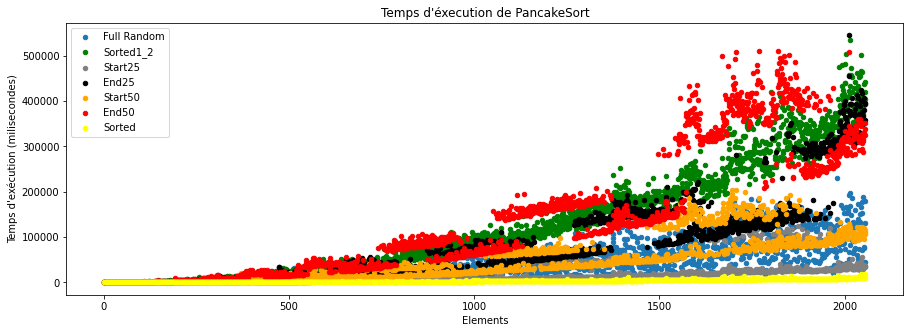

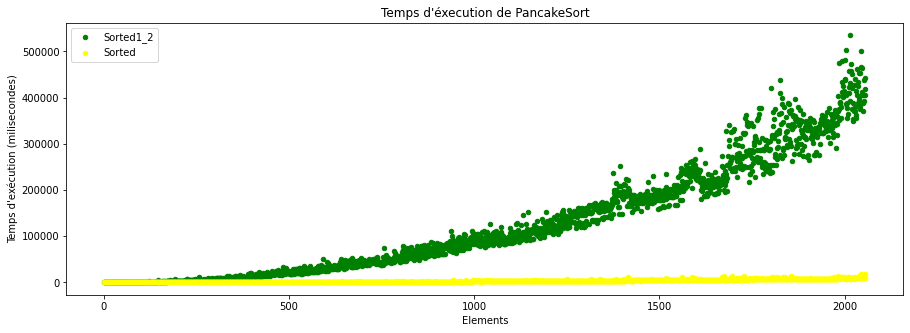

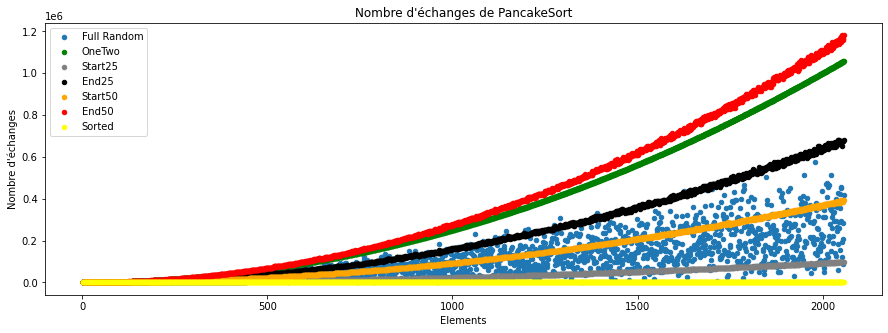

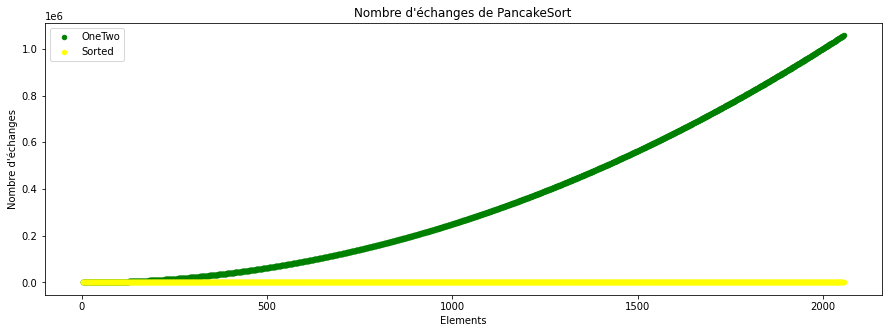

In [4]:
# solution trouvée sur https://stackoverflow.com/questions/13872533/how-to-plot-different-groups-of-data-from-a-dataframe-into-a-single-figure

fig = vitesseDF.plot.scatter(x = 'Elements', y = "Random",label = "Full Random",figsize=(15, 5)) # Permet de les mettre sur la même figure, à voir avec les vrais données si c'est lisible
vitesseDF.plot.scatter(x = "Elements", y = "Sorted1_2",c = 'g', label = "Sorted1_2", ax = fig)
vitesseDF.plot.scatter(x = "Elements", y = 'MixedStart25',c = 'grey',label = "Start25", ax = fig)
vitesseDF.plot.scatter(x = "Elements", y = 'MixedEnd25',c = 'black',label = "End25", ax = fig)
vitesseDF.plot.scatter(x = "Elements", y = 'MixedStart50',c = 'orange',label = "Start50", ax = fig)
vitesseDF.plot.scatter(x = "Elements", y = 'MixedEnd50',c = 'r',label = "End50", ax = fig)
vitesseDF.plot.scatter(x = "Elements", y = "Sorted",c = 'yellow', label = "Sorted", ax = fig)
plt.title("Temps d'éxecution de "+ NomAlgorithme)
fig.set_ylabel("Temps d'exécution (milisecondes)")
plt.legend(loc = 0)
plt.show()


fig = vitesseDF.plot.scatter(x = "Elements", y = "Sorted1_2",c = 'g', label = "Sorted1_2",figsize=(15, 5)) # Permet de les mettre sur la même figure, à voir avec les vrais données si c'est lisible
vitesseDF.plot.scatter(x = "Elements", y = "Sorted",c = 'yellow', label = "Sorted", ax = fig)
plt.title("Temps d'éxecution de "+ NomAlgorithme)
fig.set_ylabel("Temps d'exécution (milisecondes)")
plt.legend(loc = 0)
plt.show()

fig = echangesDF.plot.scatter(x = 'Elements', y = "Random",label = "Full Random",figsize=(15, 5)) # Permet de les mettre sur la même figure, à voir avec les vrais données si c'est lisible
echangesDF.plot.scatter(x = "Elements", y = "Sorted1_2",c = 'g', label = "OneTwo", ax = fig)
echangesDF.plot.scatter(x = "Elements", y = 'MixedStart25',c = 'grey',label = "Start25", ax = fig)
echangesDF.plot.scatter(x = "Elements", y = 'MixedEnd25',c = 'black',label = "End25", ax = fig)
echangesDF.plot.scatter(x = "Elements", y = 'MixedStart50',c = 'orange',label = "Start50", ax = fig)
echangesDF.plot.scatter(x = "Elements", y = 'MixedEnd50',c = 'r',label = "End50", ax = fig)
echangesDF.plot.scatter(x = "Elements", y = "Sorted",c = 'yellow', label = "Sorted", ax = fig)
plt.title("Nombre d'échanges de "+ NomAlgorithme)
fig.set_ylabel("Nombre d'échanges")
plt.legend(loc = 0)
plt.show()

fig = echangesDF.plot.scatter(x = "Elements", y = "Sorted1_2",c = 'g', label = "OneTwo", figsize=(15, 5)) # Permet de les mettre sur la même figure, à voir avec les vrais données si c'est lisible
echangesDF.plot.scatter(x = "Elements", y = "Sorted",c = 'yellow', label = "Sorted", ax = fig)
plt.title("Nombre d'échanges de "+ NomAlgorithme)
fig.set_ylabel("Nombre d'échanges")
plt.legend(loc = 0)
plt.show()

On constate à l'aide de ce nuage de points que lorsque la quantité de données est très grande le PancakeSort prend un temps n² où n est la taille de l'échantillon (ici en rouge et orange pour la moitié du tableau désordonné).

Néanmoins, quand le tableau est mélangé au hasard on obtient un léger meilleur résultat, puisque tous les éléments ne sont pas forcément désordonnés. Mais le temps reste de l'ordre de n² car les échanges son coûteux et très récurrents dans cette algorithme quand la moitié du tableau est désordonné pour un tableau n on obtient un nombre n² d'échanges ce qui explique la lenteur de l'algorithme.

Cependant, on remarque que lorsque les éléments sont triés une fois sur deux (ici en vert) le temps d'exécution croît de la même manière mais plus lentement malgré la complexité en O(N²) de l'algorithme au niveau des comparaisons.

In [5]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.odr.polynomial.html
# L'idée est ici de se représenter sous forme de fonction l'écart approximatif
# entre chacun de nos résultats pour une même taille de donnée

poly_model = odr.polynomial(2)

dataRandom = odr.Data(data.loc[:,'NumberElements'],data.loc[:,'TempsMSRd'])
odr_obj_rd = odr.ODR(dataRandom, poly_model)
output_rd = odr_obj_rd.run()

dataSorted= odr.Data(data.loc[:,'NumberElements'],data.loc[:,'TempsMSSorted'])
odr_obj_sorted = odr.ODR(dataSorted, poly_model)
output_sorted = odr_obj_sorted.run()

dataEnd50= odr.Data(data.loc[:,'NumberElements'],data.loc[:,'TempsMSEnd50'])
odr_obj_end50 = odr.ODR(dataEnd50, poly_model)
output_end50 = odr_obj_end50.run()

print(f"""Fonction d'approximation du temps d'exécution du {NomAlgorithme}
en ms en fonction de la taille de l'échantillon pour un tableau déjà trié : \n""")
print("f(n) = n*",output_sorted.beta[1]," + n² *",output_sorted.beta[2])
print()

print(f"""Fonction d'approximation du temps d'exécution du {NomAlgorithme}
en ms en fonction de la taille de l'échantillon pour un tableau mélangé aléatoirement: \n""")
print("f(n) = n*",output_rd.beta[1]," + n² *",output_rd.beta[2])
print()

print(f"""Fonction d'approximation du temps d'exécution du {NomAlgorithme}
en ms en fonction de la taille de l'échantillon pour une moitié du tableau mélangé aléatoirement: \n""")
print("f(n) = n*",output_end50.beta[1]," + n² *",output_end50.beta[2])
print()


Fonction d'approximation du temps d'exécution du PancakeSort
en ms en fonction de la taille de l'échantillon pour un tableau déjà trié : 

f(n) = n* -0.44536309710471267  + n² * 0.002537447773366673

Fonction d'approximation du temps d'exécution du PancakeSort
en ms en fonction de la taille de l'échantillon pour un tableau mélangé aléatoirement: 

f(n) = n* -9.93249958938099  + n² * 0.03767727069938913

Fonction d'approximation du temps d'exécution du PancakeSort
en ms en fonction de la taille de l'échantillon pour une moitié du tableau mélangé aléatoirement: 

f(n) = n* -23.245202644704246  + n² * 0.11556906745009436



Ici, on aperçoit que lorsque le tableau est déjà trié le temps est assez linéaire, tandis que, lorsque le nombre d'éléments désordonnés augmentent on tend à augmenter le facteur de n².

Nous allons voir si on constate ce changement au niveau du nombre d'échanges.


In [6]:
dataRandom = odr.Data(data.loc[:,'NumberElements'],data.loc[:,'NombreEchangeRd'])
odr_obj_rd = odr.ODR(dataRandom, poly_model)
output_rd = odr_obj_rd.run()

dataSorted= odr.Data(data.loc[:,'NumberElements'],data.loc[:,'NombreEchangeSorted'])
odr_obj_sorted = odr.ODR(dataSorted, poly_model)
output_sorted = odr_obj_sorted.run()

dataEnd50= odr.Data(data.loc[:,'NumberElements'],data.loc[:,'NombreEchangeEnd50'])
odr_obj_end50 = odr.ODR(dataEnd50, poly_model)
output_end50 = odr_obj_end50.run()

print(f"""Fonction d'approximation du nombre d'échanges du {NomAlgorithme}
en ms en fonction de la taille de l'échantillon pour un tableau déjà trié : \n""")
print("f(n) = n*",output_sorted.beta[1]," + n² *",output_sorted.beta[2])
print()

print(f"""Fonction d'approximation du nombre d'échanges du {NomAlgorithme}
en ms en fonction de la taille de l'échantillon pour un tableau mélangé aléatoirement: \n""")
print("f(n) = n*",output_rd.beta[1]," + n² *",output_rd.beta[2])
print()

print(f"""Fonction d'approximation du nombre d'échanges du {NomAlgorithme}
en ms en fonction de la taille de l'échantillon pour une moitié du tableau mélangé aléatoirement: \n""")
print("f(n) = n*",output_end50.beta[1]," + n² *",output_end50.beta[2])
print()


Fonction d'approximation du nombre d'échanges du PancakeSort
en ms en fonction de la taille de l'échantillon pour un tableau déjà trié : 

f(n) = n* 0.0003610535792608898  + n² * -1.365216099145004e-07

Fonction d'approximation du nombre d'échanges du PancakeSort
en ms en fonction de la taille de l'échantillon pour un tableau mélangé aléatoirement: 

f(n) = n* -26.82468768081347  + n² * 0.09918765389704233

Fonction d'approximation du nombre d'échanges du PancakeSort
en ms en fonction de la taille de l'échantillon pour une moitié du tableau mélangé aléatoirement: 

f(n) = n* -2.1483351794469225  + n² * 0.2773000599167817



Dans ces approximations, on retrouve d'abord que le nombre d'échanges pour le tableau trié est de 0 environ.
Et on remarque qu'avec notre échantillon de données l'augmentation de l'importance du terme en n² est due à l'augmentation présente pour le nombre d'échanges.

## Bilan

Après avoir analysé l'algorithme PancakeSort dans chacune des situations que nous avons expérimentées, nous proposons d'observer un diagramme en boîte nous permettant de déterminer quel est le pire cas d'utilisation et le meilleur cas d'utilisation de l'algorithme.

               Temps
Sorted          9256
Random         29102
Sorted1_2     482440
MixedStart25   34359
MixedEnd25    400000
MixedStart50  122722
MixedEnd50    333261


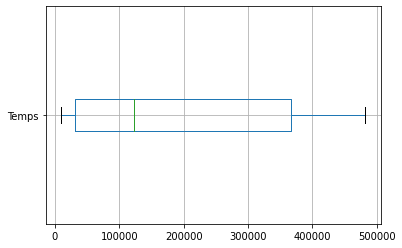

La meilleure des situations pour PancakeSort est lorsqu'il tri un tableau mélangé avec l'algorithme Sorted de mélange.
La pire des situations pour PancakeSort est lorsqu'il tri le tableau mélangé avec l'algorithme Sorted1_2 de mélange.
              Echanges
Sorted               0
Random           48246
Sorted1_2      1003001
MixedStart25     90956
MixedEnd25      641849
MixedStart50    370291
MixedEnd50     1098971


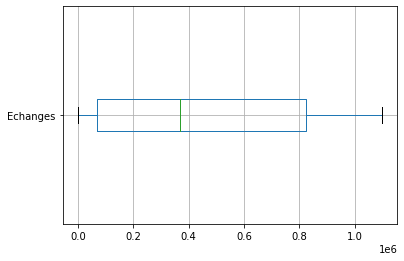

              Comparaisons
Sorted             2005002
Random             2053248
Sorted1_2          3008003
MixedStart25       2095958
MixedEnd25         2646851
MixedStart50       2375293
MixedEnd50         3103973


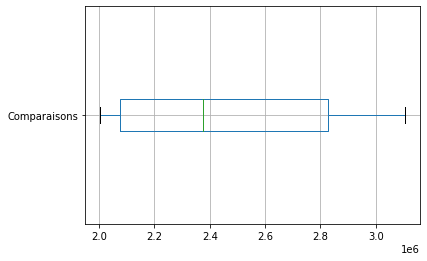

In [7]:
def findMaxRowColumnName(df):
    maximumRowsName = df.idxmax()
    return maximumRowsName

def findMinRowColumnName(df):
    minimumRowsName = df.idxmin()
    return minimumRowsName
minimum = findMinRowColumnName(finalTimeDF)
maximum = findMaxRowColumnName(finalTimeDF)

finalTimeDF.boxplot(vert = False)
print(finalTimeDF)
plt.show()

print("La meilleure des situations pour " + NomAlgorithme +
      " est lorsqu'il tri un tableau mélangé avec l'algorithme", minimum[0],"de mélange.")
print("La pire des situations pour " + NomAlgorithme + " est lorsqu'il tri le tableau mélangé avec l'algorithme", maximum[0],"de mélange.")

finalExDF.boxplot(vert = False)
print(finalExDF)
plt.show()
finalCmpDF.boxplot(vert = False)
print(finalCmpDF)

Pour conclure, nous pouvons dire que l'algorithme PancakeSort est au maximum de son efficacité lorsque le tableau a un désordre de type :  25% du début mélangé. Et que le désordre est au début du tableau.

Cependant, l'algorithme prend un temps de l'ordre de N² dans tous les cas.

La meilleure situation pour utiliser le PancakeSort est lorsque l'échantillon de données est quasiment trié et que le désordre est au début, la pire des situations est lorsque le tableau est entièrement désordonné voire même un ordre inversé.